<a href="https://colab.research.google.com/github/Sreekanth2097/Home-work/blob/main/Manohar_inclass_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 2:Laptop Pricing Project
---
**Project Name:**`Laptop Prices`

**Students Name:**`Manohar Mata`,'1

**Date:** `Nov 4 2024`

---
##Intoduction

 In this project , we will load and analyze laptop prices

In [ ]:
# Load the data
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/week1/Laptop_Prices/laptop.csv",index_col=0)
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inch', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price-binned', 'Screen-Full_HD',
       'Screen-IPS_panel'],
      dtype='object')

In [ ]:
# we have on unnecessery column in the data. Now we are going to drop it.
df_clean= df.drop('Unnamed: 0',axis=1)
df_clean.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
# In the data some numeric columns have the too many decimal points. Lets try to reduce to 2 points
pd.set_option('display.float_format','{:.2f}'.format)
df_clean.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.00,0.55,8,256,3.53,978,Low,0,1
1,Dell,3,1,1,3,15.60,0.69,4,256,4.85,634,Low,1,0
2,Dell,3,1,1,7,15.60,0.93,8,256,4.85,946,Low,1,0
3,Dell,4,2,1,5,13.30,0.55,8,128,2.69,1244,Low,0,1
4,HP,4,2,1,7,15.60,0.62,8,256,4.21,837,Low,1,0


In [ ]:
# lets find out is there is any null or missing values in the data
df.isna().sum()

,0
Unnamed: 0,0
Manufacturer,0
Category,0
GPU,0
OS,0
CPU_core,0
Screen_Size_inch,0
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


## Univariate analysis
> If Numerical -> Make histograms

> If Categorical -> Make Barplot

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# For this analysis first we need to classify the columns which are numeric and categorical
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# lets create a DataFrame for this
classifying_columns= pd.DataFrame({'numeric_columns': pd.Series(numerical_columns),
                                   'categorical_column ': pd.Series(categorical_columns)})
#Display the DataFrame
classifying_columns


,numeric_columns,categorical_column
0,Category,Manufacturer
1,GPU,Price-binned
2,OS,NaN
3,CPU_core,NaN
4,Screen_Size_inch,NaN
5,CPU_frequency,NaN
6,RAM_GB,NaN
7,Storage_GB_SSD,NaN
8,Weight_pounds,NaN
9,Price,NaN


In [ ]:
df_clean.shape

(238, 14)

## Out of 14 attributes we have 11 Numerical and 2 categorical attributes.
> For Histograms -> we take CPU_frequency

> For Barplot -> we take Price binned

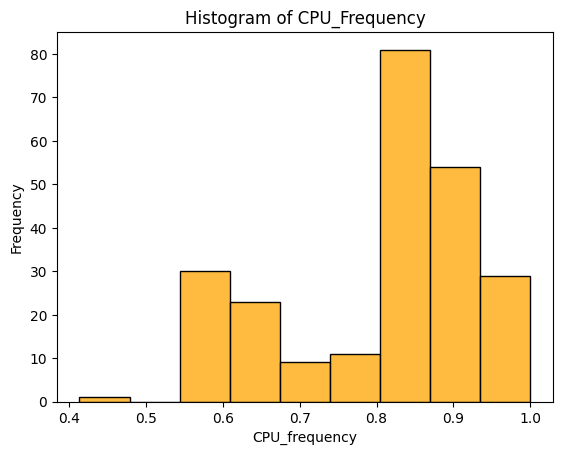

In [ ]:
## Histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_clean['CPU_frequency'],color='orange')
plt.title('Histogram of CPU_Frequency')
plt.ylabel('Frequency')
plt.show();

# The data in the cpu_frequency is not distributed normally

Text(0, 0.5, 'Frequency')

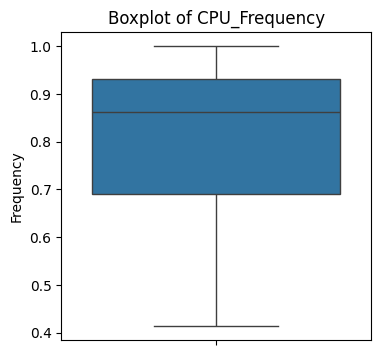

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(df_clean['CPU_frequency'])
plt.title('Boxplot of CPU_Frequency')
plt.xlabel('')
plt.ylabel('Frequency')

## By reviewing the Boxplot we can say that CPU_frequency attribute dont have any outliers which will helps to improve the performance of the model.

## Barplot

In [ ]:
# we will count the each value in the price_binned
price_binned= df_clean['Price-binned'].value_counts()

# Now convert the count of data into DF
price_binned_df = pd.DataFrame(price_binned).reset_index()
price_binned_df.columns=['price_binned','count']
price_binned_d

,price_binned,count
0,Low,160
1,Medium,72
2,High,6


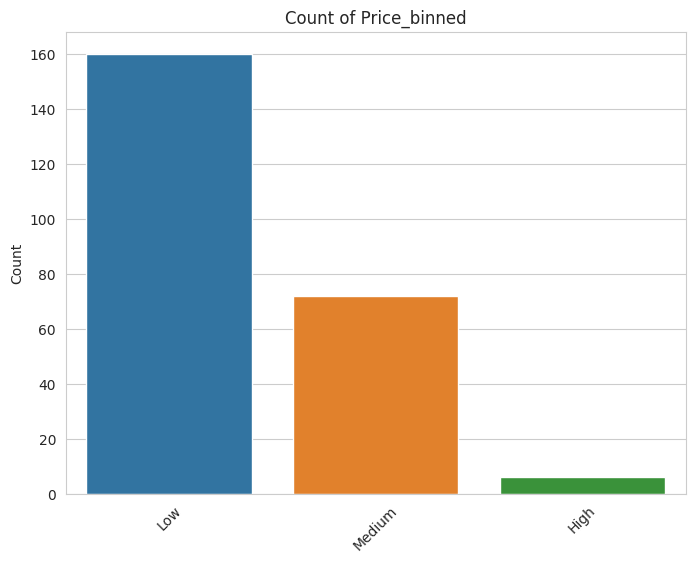

In [ ]:
# sor the data in decesending order
price_binned_df=price_binned_df.sort_values(by='count',ascending= False)

#Set the style of seaborn
sns.set_style('whitegrid')

#set the palette
palette=sns.color_palette("tab10")

#creat the bar graph
plt.figure(figsize=(8,6))
sns.barplot(data=price_binned_df, x = 'price_binned', y = 'count', palette = palette )
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Count of Price_binned')
plt.xticks(rotation=45) #For the company name will rotate to 45 degrees
plt.show()

## Bivariate Analysis
---
Numerical and Numerical

Scatterplot

In [ ]:
df_clean.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.00,0.55,8,256,3.53,978,Low,0,1
1,Dell,3,1,1,3,15.60,0.69,4,256,4.85,634,Low,1,0
2,Dell,3,1,1,7,15.60,0.93,8,256,4.85,946,Low,1,0
3,Dell,4,2,1,5,13.30,0.55,8,128,2.69,1244,Low,0,1
4,HP,4,2,1,7,15.60,0.62,8,256,4.21,837,Low,1,0


### let find the relation between the predictor variable and criterion variable

>Predictor - Storage_GB_SSD

>criterion - Price


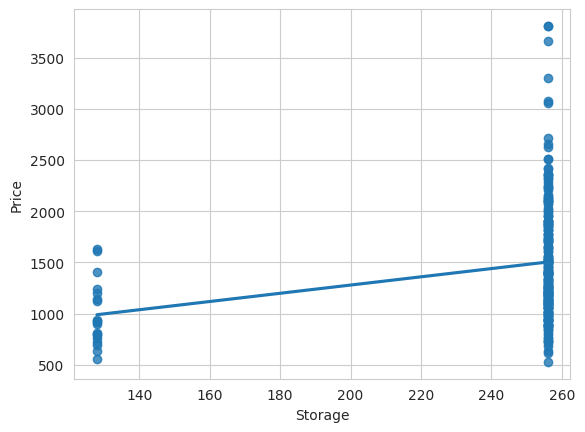

In [ ]:
sns.regplot(x='Storage_GB_SSD', y='Price', data=df_clean,ci=False)
plt.xlabel('Storage')
plt.ylabel('Price')
plt.show();

## Interpretation:
>1.The regplot show the positive relationship b/w the variables which says increase in the storage will increase the price and the slop is  shallow we can say there is a weak poitive relatio.

>2.Most of the data is clusterd at 140 and 260. so we can say that these are the common storages that people use.

>3.There are few outliers at 2500 to 3500 we can assume that the laptops have the extreme fetures that why they are expensive.

## Categorical and Numerical
>Boxplot

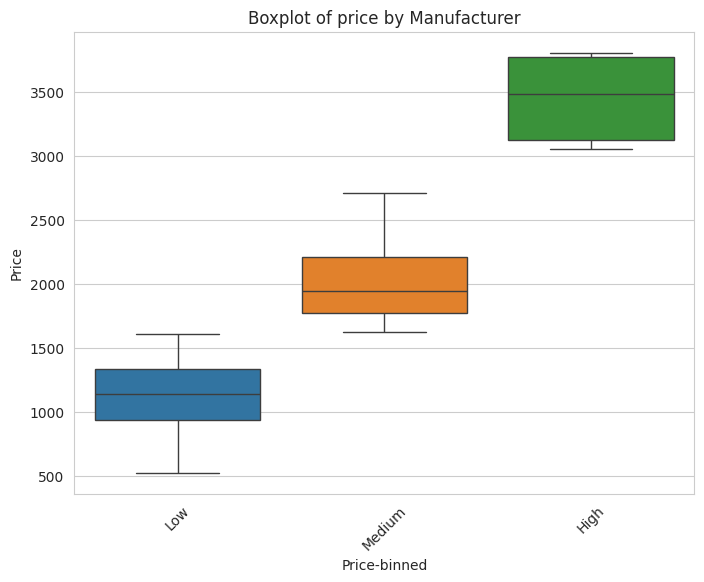

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Price-binned', y='Price', data=df_clean,  palette=palette)
plt.title("Boxplot of price by Manufacturer")
plt.xticks(rotation=45)
plt.show()

## Interpretation
>Low : The low-end laptops are priced b/w 500 to 1500 and the medain is approxiematly 1200 price. so we can say that most of the customers are purchasing low end lapotop with the price range of 900 to 1400.

>Medium: The medum-end laptops are priced approxiematly between 1500 to 2800 and the medium is 1900. Most of the customers purchase a medium priced laptop is in the range of 1700 to 2300.

>High: Very few laptops are purchased with advanced features with price range of 3200 to 3800.

In [ ]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path= '/content/drive/MyDrive/week1/Laptop_Prices/Manohar_inclass_exercise'
output_html_path = '/content/drive/MyDrive/week1/Laptop_Prices/HTML/manohar.html'

with open(notebook_path) as f:
  notebook_content=nbformat.read(f, as_version=4)

#convert to HTML
html_exporter= HTMLExporter()
(body , resources) = html_exporter.from_notebook_node(notebook_content)

#save to HTML file
with open(output_html_path, 'w') as f:
  f.write(body)
